Control Work 2. Malysh Igor Igorevich

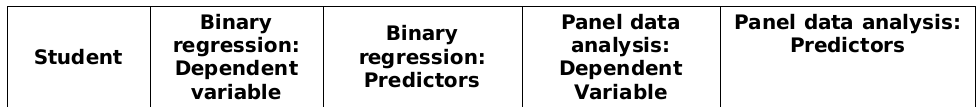
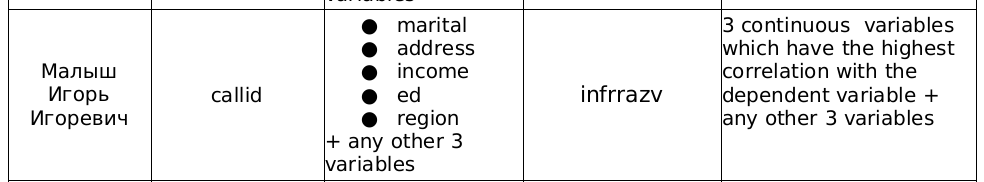

binary regression = telco.xls

panel data analysis = SMEs.xls

*LLM usage*

Almost all code snippets were taken from homeworks. 

But in some parts of this project I used LLM model as an assistant, not as the main author of the analysis.

Specifically:

- I requested recommendations for formatting graphs and Markdown comments so that the notebook is consistent.

- All data loading, writing code, execution of code, interpretation of results, and final conclusions were done by me,
based on the dataset and the course requirements.


LLM was used as a support tool for:

- Speed up the search for Python libraries,

- Speeding up the writing of small pieces of code,

- checking the correctness of statistical methods

Therefore, LLM was not the author of the work, but a helper for speeding up coding and structuring. 
*All ideas, analysis, choice of variables, and interpretation remain my own*.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# part 1

df = pd.read_excel('telco.xls')


df.head()
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'multline', 'voice', 'internet', 'callid', 'callwait', 'forward',
       'confer'],
      dtype='object')

In [3]:
dependent_variable = 'callid'
df[dependent_variable].head(5)

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: callid, dtype: object

In [4]:
predictors = ['marital', 'address', 'income', 'ed', 'region']
df[predictors].head(5)

,marital,address,income,ed,region
0,Married,9,64,College degree,Zone 2
1,Married,7,136,Post-undergraduate degree,Zone 3
2,Married,24,116,Did not complete high school,Zone 3
3,Unmarried,12,33,High school degree,Zone 2
4,Married,9,30,Did not complete high school,Zone 2


1.1.Do the descriptive analysis of all the variables which will be used in binary regression analysis. Each quantitative output should be accompanied with your textual interpretation of the obtained calculations. Prove that the selected predictors could be used simultaneously in one binary regression model. Formulate the research hypotheses which will be verified during the regression analysis.

In [5]:
df[predictors].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   marital  1000 non-null   object
 1   address  1000 non-null   int64 
 2   income   1000 non-null   int64 
 3   ed       1000 non-null   object
 4   region   1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


we have categorical and numeric vars, we will need to tf cat vars to numeric using cat codes

(conver obj to cat btw)

In [6]:
# + lets ecnode dependent variable



cat_predictors_cols = ['marital', 'ed', 'region']

df['marital'] = df['marital'].astype('category')
df['ed'] = df['ed'].astype('category')
df['region'] = df['region'].astype('category')
df[dependent_variable] = df[dependent_variable].astype('category')


df['marital_code'] = df['marital'].cat.codes
df['ed_code'] = df['ed'].cat.codes
df['region_code'] = df['region'].cat.codes
df[dependent_variable + '_code'] = df[dependent_variable].cat.codes

# df
df['region'].cat.categories


# num to category
mappings = {}
for c in cat_predictors_cols:
    cats = df[c].cat.categories
    mappings[c] = {
        'code_to_label': {i: label for i, label in enumerate(cats)},
        'label_to_code': {label: i for i, label in enumerate(cats)}
    }

mappings

{'marital': {'code_to_label': {0: 'Married', 1: 'Unmarried'},
  'label_to_code': {'Married': 0, 'Unmarried': 1}},
 'ed': {'code_to_label': {0: 'College degree',
   1: 'Did not complete high school',
   2: 'High school degree',
   3: 'Post-undergraduate degree',
   4: 'Some college'},
  'label_to_code': {'College degree': 0,
   'Did not complete high school': 1,
   'High school degree': 2,
   'Post-undergraduate degree': 3,
   'Some college': 4}},
 'region': {'code_to_label': {0: 'Zone 1', 1: 'Zone 2', 2: 'Zone 3'},
  'label_to_code': {'Zone 1': 0, 'Zone 2': 1, 'Zone 3': 2}}}

In [7]:
# lets check out na data

df.isna().sum()

# so we dont have missing rows, nice

region          0
tenure          0
age             0
marital         0
address         0
income          0
ed              0
employ          0
retire          0
gender          0
reside          0
tollfree        0
equip           0
callcard        0
wireless        0
longmon         0
tollmon         0
equipmon        0
cardmon         0
wiremon         0
multline        0
voice           0
internet        0
callid          0
callwait        0
forward         0
confer          0
marital_code    0
ed_code         0
region_code     0
callid_code     0
dtype: int64

In [8]:
# lets choose numeric variables


In [9]:
# check existsing cols


num_predictors_cols = ["address", "income"]

df[num_predictors_cols].corr()

,address,income
address,1.000000,0.226781
income,0.226781,1.000000


In [10]:


from scipy.stats import pointbiserialr


num_df = df.select_dtypes(include=['number'])   
num_cols = num_df.columns.tolist()              

df[num_cols].corr()


,tenure,age,address,income,employ,reside,longmon,tollmon,equipmon,cardmon,wiremon,marital_code,ed_code,region_code,callid_code
tenure,1.000000,0.490217,0.522952,0.242912,0.520288,-0.036592,0.713678,0.226529,-0.060356,0.439972,0.102091,-0.154171,0.005088,0.016388,0.058311
age,0.490217,1.000000,0.660435,0.327948,0.670047,-0.254993,0.401273,0.168817,-0.127305,0.290600,0.034313,0.014433,-0.017344,0.015034,0.080998
address,0.522952,0.660435,1.000000,0.226781,0.463291,-0.201645,0.465633,0.149459,-0.114087,0.276900,0.013004,0.012051,-0.026007,0.010320,0.032155
income,0.242912,0.327948,0.226781,1.000000,0.516349,-0.097591,0.194624,0.173492,0.001052,0.120870,0.128254,0.043984,0.020913,0.023765,0.156401
employ,0.520288,0.670047,0.463291,0.516349,1.000000,-0.134683,0.469142,0.235056,-0.161108,0.276390,0.031978,0.002891,0.009566,0.016335,0.143053
reside,-0.036592,-0.254993,-0.201645,-0.097591,-0.134683,1.000000,-0.035950,0.045488,0.020096,0.004739,0.047803,-0.625999,-0.036781,-0.065158,0.034572
longmon,0.713678,0.401273,0.465633,0.194624,0.469142,-0.035950,1.000000,0.205399,-0.047662,0.394982,0.063911,-0.129905,-0.008887,-0.001581,0.056254
tollmon,0.226529,0.168817,0.149459,0.173492,0.235056,0.045488,0.205399,1.000000,0.053753,0.328561,0.445983,-0.069274,-0.006664,0.029748,0.565141
equipmon,-0.060356,-0.127305,-0.114087,0.001052,-0.161108,0.020096,-0.047662,0.053753,1.000000,0.037129,0.561136,-0.013013,-0.010342,-0.015332,0.113811
cardmon,0.439972,0.290600,0.276900,0.120870,0.276390,0.004739,0.394982,0.328561,0.037129,1.000000,0.254277,-0.100684,-0.049578,-0.003259,0.276932


In [11]:
# address income
# using greedy algo we have chosen these 3 vars (corr coef less than 0.5 with each others)



chosen_vars = ['reside', 'tollmon', 'cardmon']

df[chosen_vars+num_predictors_cols].corr()


,reside,tollmon,cardmon,address,income
reside,1.000000,0.045488,0.004739,-0.201645,-0.097591
tollmon,0.045488,1.000000,0.328561,0.149459,0.173492
cardmon,0.004739,0.328561,1.000000,0.276900,0.120870
address,-0.201645,0.149459,0.276900,1.000000,0.226781
income,-0.097591,0.173492,0.120870,0.226781,1.000000


In [12]:
# research hypotheses
# used llm for formatting, because the text is template like

research hypotheses:

1) marital_code - client's marital status

H0: marital status has no effect on the probability of callid

H1: marital status affects the probability of callid

2) address - type of client's address (e.g., urban/rural)

H0: address has no effect on the probability of callid

H1: address affects the probability of callid

3) income - client's income

H0: income has no effect on the probability of callid

H1: higher income increases the probability of callid

4) ed_code - client's education level

H0: education level has no effect on the probability of callid

H1: education level affects the probability of callid

5) region_code - client's region of residence

H0: region has no effect on the probability of callid

H1: region affects the probability of callid


1.2.Build a binary logistic regression model. Specify the regression equation (at least the linear part of it). Assess the goodness-of-fit of the model (statistical significance, accuracy, AUC). Create the ROC curve and describe it.

In [13]:
predictors = [ 'marital_code', 'address', 'income',  'ed_code', 'region_code']
predictors += chosen_vars
df[predictors]

,marital_code,address,income,ed_code,region_code,reside,tollmon,cardmon
0,0,9,64,0,1,2,0.00,7.50
1,0,7,136,3,2,6,20.75,15.25
2,0,24,116,1,2,2,18.00,30.25
3,1,12,33,2,1,1,0.00,0.00
4,0,9,30,1,1,4,0.00,0.00
...,...,...,...,...,...,...,...,...
995,1,0,27,4,2,3,0.00,0.00
996,1,2,22,3,0,1,0.00,0.00
997,1,40,944,3,2,1,32.00,35.75
998,1,18,87,2,2,1,33.50,25.25


In [14]:
# splitting!

predictor_vars = predictors
X = df[predictors]
y = df[dependent_variable + '_code']

X

,marital_code,address,income,ed_code,region_code,reside,tollmon,cardmon
0,0,9,64,0,1,2,0.00,7.50
1,0,7,136,3,2,6,20.75,15.25
2,0,24,116,1,2,2,18.00,30.25
3,1,12,33,2,1,1,0.00,0.00
4,0,9,30,1,1,4,0.00,0.00
...,...,...,...,...,...,...,...,...
995,1,0,27,4,2,3,0.00,0.00
996,1,2,22,3,0,1,0.00,0.00
997,1,40,944,3,2,1,32.00,35.75
998,1,18,87,2,2,1,33.50,25.25


In [15]:
y

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    1
998    1
999    0
Name: callid_code, Length: 1000, dtype: int8

In [16]:
# let do the model!!!

import statsmodels.api as sm


x_mult_constant = sm.add_constant(X)

model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())



Optimization terminated successfully.
         Current function value: 0.470095
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            callid_code   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Sat, 29 Nov 2025   Pseudo R-squ.:                  0.3211
Time:                        14:46:02   Log-Likelihood:                -470.10
converged:                       True   LL-Null:                       -692.43
Covariance Type:            nonrobust   LLR p-value:                 5.154e-91
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.6354      0.354     -4.614      0.000      -2.330      -0.941
marital_code     0.0485

In [17]:
# code from hw6

# regression equation 

l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = -1.635417 + 0.05*marital_code + -0.03*address + 0.00*income + 0.01*ed_code + 0.04*region_code + 0.03*reside + 0.10*tollmon + 0.02*cardmon


In [18]:
# and furthers parts also from hw6

goodness of fit of the model

In [19]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.321088
Model significance = 0.000000


Model is statistically significant. It explains 32.1% of the variation of the dependent variable.

In [20]:
# also hw6



def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
marital_code,0.819,non-significant
address,0.001,significant
income,0.009,significant
ed_code,0.881,non-significant
region_code,0.678,non-significant
reside,0.682,non-significant
tollmon,0.000,significant
cardmon,0.000,significant


In [21]:
f'Statistically significant model parameters: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Statistically significant model parameters: ['const' 'address' 'income' 'tollmon' 'cardmon']"

In [22]:
f'Statistically nonsignificant model parameters: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Statistically nonsignificant model parameters: ['marital_code' 'ed_code' 'region_code' 'reside']"

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

In [24]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
3,1.005180,ed_code
4,1.008469,region_code
2,1.083412,income
6,1.152998,tollmon
1,1.195638,address
7,1.205428,cardmon
0,1.699884,marital_code
5,1.761968,reside


There are no VIF values greater than 10. There is no multicollinearity problem.

ROC curve

In [25]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

fpr, tpr, _ = roc_curve(y, model1.predict())
roc_auc = auc(fpr, tpr)
roc_auc

0.8616562315984281

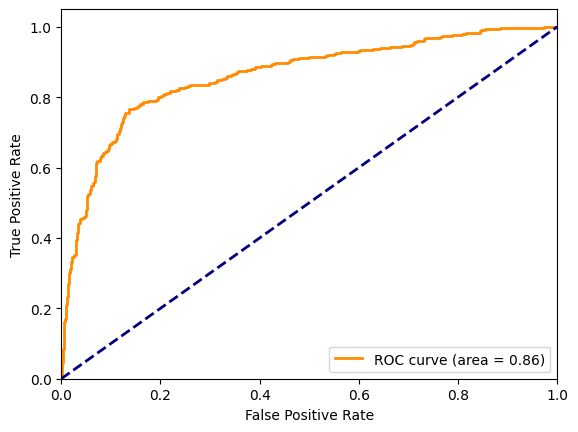

In [26]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


roc curve descripiton

AUC = 0.86


The area under the ROC is 0.93. According to the lecture, AUC = 0.5 corresponds to a random classifier, while values closer to 1.0 indicate better discrimination between positive and negative classes. Thus, AUC = 0.93 indicates excellent discriminatory ability of the fitted model.

the curves closeness to the top-left corner shows the model achieves high sensitivity for low false positive rates

1.3.Assess the statistical significance of the regression coefficients. Describe the relationships between each predictor and dependent variable in detail based on the regression coefficients. This is an important point of the task. 

In [27]:
# your code here


def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'


pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
marital_code,0.819,non-significant
address,0.001,significant
income,0.009,significant
ed_code,0.881,non-significant
region_code,0.678,non-significant
reside,0.682,non-significant
tollmon,0.000,significant
cardmon,0.000,significant


In [28]:

ci = model1.conf_int()
res_table = pd.DataFrame({
    'coef': model1.params,
    'std_err': model1.bse,
    'z': model1.tvalues,
    'p_value': model1.pvalues,
    'ci_low': ci[0],
    'ci_high': ci[1],
})
res_table

,coef,std_err,z,p_value,ci_low,ci_high
const,-1.635417,0.354457,-4.613872,3.952366e-06,-2.330139,-0.940695
marital_code,0.048455,0.211753,0.228826,8.190041e-01,-0.366573,0.463482
address,-0.030825,0.009450,-3.262044,1.106119e-03,-0.049346,-0.012304
income,0.002874,0.001101,2.611041,9.026702e-03,0.000717,0.005031
ed_code,0.008547,0.057254,0.149289,8.813260e-01,-0.103669,0.120764
region_code,0.041482,0.099771,0.415769,6.775791e-01,-0.154066,0.237030
reside,0.030996,0.075554,0.410246,6.816254e-01,-0.117087,0.179078
tollmon,0.104972,0.006900,15.212543,2.919753e-52,0.091448,0.118497
cardmon,0.023546,0.006277,3.751043,1.761008e-04,0.011243,0.035849


1.4.Do the model diagnostics. Conduct cross-validation of the model and describe the results obtained.

In [29]:
# your code here

from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x_mult_constant, y, test_size = 0.2, random_state = 0)
x_train

,const,marital_code,address,income,ed_code,region_code,reside,tollmon,cardmon
687,1.0,1,6,22,4,1,1,0.00,0.00
500,1.0,1,19,32,2,1,1,0.00,0.00
332,1.0,1,18,33,1,2,1,24.25,11.25
979,1.0,1,24,83,1,1,1,24.50,14.25
817,1.0,1,13,248,2,2,3,39.75,22.25
...,...,...,...,...,...,...,...,...,...
835,1.0,0,1,20,2,1,4,0.00,0.00
192,1.0,1,2,19,4,0,1,0.00,5.00
629,1.0,0,3,26,1,1,4,0.00,0.00
559,1.0,1,13,62,4,1,2,36.25,19.75


In [30]:
x_test

,const,marital_code,address,income,ed_code,region_code,reside,tollmon,cardmon
993,1.0,0,30,26,4,2,2,23.50,23.75
859,1.0,0,12,31,2,2,6,0.00,0.00
298,1.0,1,2,88,4,0,1,33.75,29.75
553,1.0,0,2,68,2,1,5,43.50,29.50
672,1.0,0,24,87,2,0,3,47.50,25.00
...,...,...,...,...,...,...,...,...,...
679,1.0,0,4,205,0,2,4,0.00,0.00
722,1.0,0,6,18,1,0,2,0.00,0.00
215,1.0,1,27,200,4,1,1,0.00,74.00
653,1.0,0,30,24,1,2,2,16.00,0.00


In [31]:
y_train

687    0
500    0
332    0
979    0
817    1
      ..
835    0
192    0
629    0
559    1
684    0
Name: callid_code, Length: 800, dtype: int8

In [32]:
y_test

993    1
859    0
298    1
553    1
672    1
      ..
679    0
722    0
215    0
653    0
150    0
Name: callid_code, Length: 200, dtype: int8

In [33]:
# from hw 6
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression



lr = LogisticRegression()

lr.fit(x_train, y_train)
pred = lr.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
sensitivity_train = tp / (tp + fn)
specificity_train = tn / (tn + fp)

print(f"Sensitivity = {sensitivity_train:.4f}")
print(f"Specificity = {specificity_train:.4f}")


Train Result:
Accuracy Score: 80.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.793981    0.812500    0.8025    0.803241      0.802963
recall       0.832524    0.770619    0.8025    0.801571      0.802500
f1-score     0.812796    0.791005    0.8025    0.801901      0.802228
support    412.000000  388.000000    0.8025  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[343  69]
 [ 89 299]]

Sensitivity = 0.7706
Specificity = 0.8325


In [34]:
pred = lr.predict(x_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
sensitivity_train = tp / (tp + fn)
specificity_train = tn / (tn + fp)

print(f"Sensitivity = {sensitivity_train:.4f}")
print(f"Specificity = {specificity_train:.4f}")


Train Result:
Accuracy Score: 86.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.838983   0.902439     0.865    0.870711      0.868490
recall       0.925234   0.795699     0.865    0.860466      0.865000
f1-score     0.880000   0.845714     0.865    0.862857      0.864057
support    107.000000  93.000000     0.865  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[99  8]
 [19 74]]

Sensitivity = 0.7957
Specificity = 0.9252


# used llm to formulate ideas

The model demonstrates stable behavior on the training and test sets: accuracy 80.25% (training) and 86.50% (testing), and specificity 83.25% (training) and 92.52% (testing). This indicates the absence of overfitting with respect to accuracy — test accuracy did not decrease and is even higher than on the training set.

However, sensitivity (recall) for the positive class is moderate: 77.06% (training) and 79.57% (testing). In practice, this means the model misses some positive cases (false negatives = 89 on train and 19 on test). The number of false positives is small (69 on train and 8 on test). Therefore, the high overall accuracy is mainly due to correct classification of negative cases (TN = 343 on train, 99 on test), rather than perfect detection of positives.

Conclusion: the model distinguishes negative examples well (high specificity), while sensitivity is acceptable but not outstanding. To improve detection of positive cases you can consider adjusting the decision threshold, using class weighting (e.g., `class_weight='balanced'`), optimizing for recall or F1 on validation, or adding features / applying different regularization.


1.5.Make final conclusions based on the results of the regression analysis (they should not simply repeat what was written in the previous sections, you should try to generalize your findings). Which of the data analysis results were expected for you, and which were unexpected?

In [ ]:
# todo 
# used llm to format my ideas

hypotheses checks:

marital_code:
Do not reject H₀ — because p-value = 0.819 (> 0.05).
Coefficient = 0.0485 (not statistically significant).

address:
Reject H₀ — because p-value = 0.001 (< 0.05).
Coefficient = -0.0308, Odds Ratio (OR) ≈ 0.9697, 95% CI for OR ≈ (0.9522, 0.9881).
Interpretation: Higher address value is associated with a decrease in the odds of callid (statistically significant, though the effect size per unit is small).

income:
Reject H₀ — because p-value = 0.009 (< 0.05).
Coefficient = 0.0029, OR ≈ 1.0029, 95% CI for OR ≈ (1.0010, 1.0050).
Interpretation: Higher income is associated with increased odds of callid. The effect is statistically significant but very small per one-unit increase (check the income scale for practical interpretation).

ed_code:
Do not reject H₀ — because p-value = 0.881 (> 0.05).
Coefficient = 0.0085 (not statistically significant).

region_code:
Do not reject H₀ — because p-value = 0.678 (> 0.05).
Coefficient = 0.0415 (not statistically significant).

The model demonstrates overall statistical strength: LLR p-value = 5.154e-91 and Pseudo R-squared = 0.3211, which indicates the model explains a meaningful portion of variance in callid. However, a major limitation is that several demographic predictors are not informative in this dataset (marital status, education, region) and some statistically significant predictors have very small per-unit effects (e.g., income and address), so practical impact per single unit change is limited. The model’s clearest and most robust signals are behavioural/usage features: tollmon and cardmon are strongly and positively associated with the likelihood of callid.

The model showed a statistically significant and interpretable result: key factors such as tollmon and cardmon were positively associated with the probability of callid.

Expected findings:

tollmon — reject H₀ (significant): customers with higher toll spending are more likely to have callid.

cardmon — reject H₀ (significant): higher card-related spending is associated with higher probability of callid.

Unexpected findings:

marital_code — do not reject H₀: marital status had no detectable effect, which is unexpected if demographic segmentation was anticipated to matter.

2.1.Formulate hypotheses about the existence of relationships between the dependent and independent variables. Conduct descriptive data analysis considering that the data have panel structure.

In [36]:


df = pd.read_excel('SMEs.xls')

df.head()


,id,year,Region,District,Rabotniki,SubMSP,Vnovsozd,oborot,InvestFC,fedsub,...,newSMBdo30,naselenie,edu30,biznav,im,infrmoney,infrrazv,suppmsp,vrp,budg
0,1,2016,Moscow,Central,2608366,731632,150349,1.686972e+13,1.883730e+11,705299000.0,...,0.0,12355400,0,6766.08,104.0,705.000000,23.0,425,1.429980e+07,1.852642e+06
1,1,2017,Moscow,Central,2199321,768618,159342,1.499113e+13,3.439057e+11,555608500.0,...,0.0,12380700,0,7048.00,114.0,0.000000,26.0,11401,1.590428e+07,2.000854e+06
2,1,2018,Moscow,Central,2200603,780902,150734,1.467666e+13,1.467666e+13,481000000.0,...,0.0,12506468,0,25400.00,152.0,362.164356,28.6,13111,1.780433e+07,2.134911e+06
3,2,2016,Saint Petersburg,Northwestern,1151893,334994,66107,5.854914e+12,2.343767e+10,96443000.0,...,0.0,5253600,100,1585.92,2504.0,121.000000,9.0,3834,3.742182e+06,4.766638e+05
4,2,2017,Saint Petersburg,Northwestern,1082580,347355,64414,4.396981e+12,3.118336e+10,59893240.0,...,0.0,5281600,122,1652.00,2775.0,200.000000,10.0,7384,4.162067e+06,5.147969e+05


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             255 non-null    int64  
 1   year           255 non-null    int64  
 2   Region         255 non-null    object 
 3   District       255 non-null    object 
 4   Rabotniki      255 non-null    int64  
 5   SubMSP         255 non-null    int64  
 6   Vnovsozd       255 non-null    int64  
 7   oborot         255 non-null    float64
 8   InvestFC       255 non-null    float64
 9   fedsub         253 non-null    float64
 10  minekfed       255 non-null    float64
 11  minekreg       255 non-null    int64  
 12  fz22344        255 non-null    float64
 13  saldfinresult  255 non-null    float64
 14  newrabmesta    255 non-null    float64
 15  newSMBdo30     255 non-null    float64
 16  naselenie      255 non-null    int64  
 17  edu30          255 non-null    int64  
 18  biznav    

In [38]:
dependent_var = 'infrrazv'
df[dependent_var]

0      23.0
1      26.0
2      28.6
3       9.0
4      10.0
       ... 
250     4.0
251     4.4
252     4.0
253     4.0
254     4.4
Name: infrrazv, Length: 255, dtype: float64

In [39]:
# check na
# took from hw7
df.isna().sum()

id               0
year             0
Region           0
District         0
Rabotniki        0
SubMSP           0
Vnovsozd         0
oborot           0
InvestFC         0
fedsub           2
minekfed         0
minekreg         0
fz22344          0
saldfinresult    0
newrabmesta      0
newSMBdo30       0
naselenie        0
edu30            0
biznav           0
im               0
infrmoney        0
infrrazv         0
suppmsp          0
vrp              0
budg             0
dtype: int64

In [40]:
df = df.dropna()
df.isna().sum()
# now everyth is ok

id               0
year             0
Region           0
District         0
Rabotniki        0
SubMSP           0
Vnovsozd         0
oborot           0
InvestFC         0
fedsub           0
minekfed         0
minekreg         0
fz22344          0
saldfinresult    0
newrabmesta      0
newSMBdo30       0
naselenie        0
edu30            0
biznav           0
im               0
infrmoney        0
infrrazv         0
suppmsp          0
vrp              0
budg             0
dtype: int64

In [41]:
# lets convert cat vars to codes

cat_cols = ['Region', 'District']

df['Region'] = df['Region'].astype('category')
df['District'] = df['District'].astype('category')

df['Region_code'] = df['Region'].cat.codes
df['District_code'] = df['District'].cat.codes


# num to category
mappings = {}
for c in cat_cols:
    cats = df[c].cat.categories
    mappings[c] = {
        'code_to_label': {i: label for i, label in enumerate(cats)},
        'label_to_code': {label: i for i, label in enumerate(cats)}
    }

df['Region'] = df['Region'].cat.codes
df['District'] = df['District'].cat.codes

df

,id,year,Region,District,Rabotniki,SubMSP,Vnovsozd,oborot,InvestFC,fedsub,...,edu30,biznav,im,infrmoney,infrrazv,suppmsp,vrp,budg,Region_code,District_code
0,1,2016,32,0,2608366,731632,150349,1.686972e+13,1.883730e+11,705299000.0,...,0,6766.08,104.000000,705.000000,23.0,425,1.429980e+07,1.852642e+06,32,0
1,1,2017,32,0,2199321,768618,159342,1.499113e+13,3.439057e+11,555608500.0,...,0,7048.00,114.000000,0.000000,26.0,11401,1.590428e+07,2.000854e+06,32,0
2,1,2018,32,0,2200603,780902,150734,1.467666e+13,1.467666e+13,481000000.0,...,0,25400.00,152.000000,362.164356,28.6,13111,1.780433e+07,2.134911e+06,32,0
3,2,2016,60,3,1151893,334994,66107,5.854914e+12,2.343767e+10,96443000.0,...,100,1585.92,2504.000000,121.000000,9.0,3834,3.742182e+06,4.766638e+05,60,3
4,2,2017,60,3,1082580,347355,64414,4.396981e+12,3.118336e+10,59893240.0,...,122,1652.00,2775.000000,200.000000,10.0,7384,4.162067e+06,5.147969e+05,60,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,84,2017,72,4,8328,6845,1327,1.103968e+10,-2.698255e+08,23433290.0,...,172,8.00,74.000000,10.000000,4.0,1490,5.808069e+04,2.463497e+04,72,4
251,84,2018,72,4,8788,6922,1485,1.422781e+10,1.422781e+10,26983600.0,...,251,1208.00,113.333333,5.650791,4.4,1714,6.501945e+04,2.628552e+04,72,4
252,85,2016,13,1,12163,4322,606,2.527910e+10,3.717700e+08,7349000.0,...,0,7.68,290.000000,0.000000,4.0,68,4.687220e+04,9.741238e+03,13,1
253,85,2017,13,1,12882,4203,547,2.104477e+10,3.070902e+08,4326608.0,...,158,8.00,415.000000,4.000000,4.0,1316,5.213140e+04,1.052054e+04,13,1


In [42]:
# lets chose predictors!

# infrrazv
# 3 continuous vars (w highest corr w dependent)
# 3 any other

df.corr()[dependent_var].drop(dependent_var).sort_values(ascending=False)

suppmsp          0.240974
naselenie        0.219376
minekfed         0.210090
Rabotniki        0.201011
infrmoney        0.197350
budg             0.194567
SubMSP           0.186353
Vnovsozd         0.185510
oborot           0.180459
fedsub           0.175077
vrp              0.173734
biznav           0.166145
saldfinresult    0.153351
minekreg         0.150521
InvestFC         0.137183
fz22344          0.108006
newrabmesta      0.077704
year             0.068699
im               0.022095
edu30            0.011152
Region_code     -0.004503
Region          -0.004503
District_code   -0.004677
District        -0.004677
newSMBdo30      -0.013231
id              -0.203169
Name: infrrazv, dtype: float64

<Axes: >

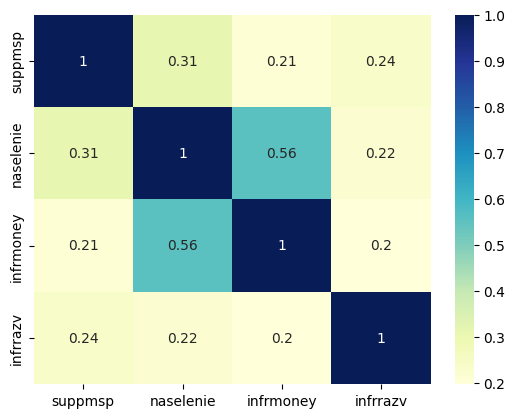

In [43]:
# selecting vars using greedy algorithm (look for highest corr with target var but lowest possible with others (less than 0.6))

selected_vars_w_highest_corr_w_target = ['suppmsp', 'naselenie', 'infrmoney']

sns.heatmap(df[selected_vars_w_highest_corr_w_target + [dependent_var]].corr(), annot=True, cmap='YlGnBu',)

<Axes: >

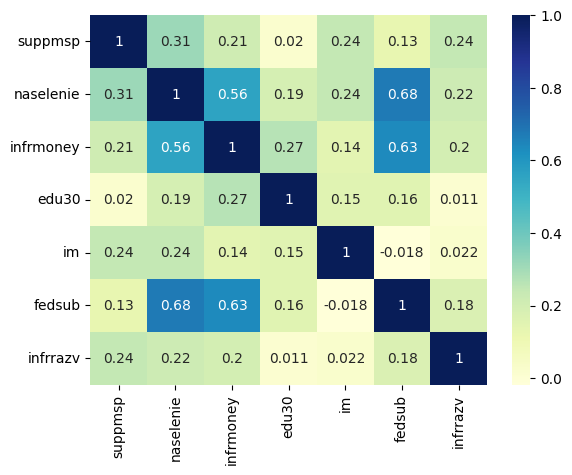

In [44]:
# lets make sure, that selected other vars have low corr with others (less than 0.7)

selected_vars_other_ones = ["edu30", "im", "fedsub"]
# selected_vars_other_ones = []


sns.heatmap(df[selected_vars_w_highest_corr_w_target + selected_vars_other_ones + [dependent_var]].corr(), annot=True, cmap='YlGnBu',)

In [45]:
selected_vars_total = selected_vars_w_highest_corr_w_target + selected_vars_other_ones
df[selected_vars_total].head()

,suppmsp,naselenie,infrmoney,edu30,im,fedsub
0,425,12355400,705.000000,0,104.0,705299000.0
1,11401,12380700,0.000000,0,114.0,555608500.0
2,13111,12506468,362.164356,0,152.0,481000000.0
3,3834,5253600,121.000000,100,2504.0,96443000.0
4,7384,5281600,200.000000,122,2775.0,59893240.0


In [ ]:
# hypotheses
# formated using llm

suppmsp — number of SMEs that received support from SME support infrastructure organizations (units)
H0: The number of SMEs that received support (suppmsp) has no effect on the number of SME support infrastructure organizations (infrrazv). (β₁ = 0)
H1: A higher number of SMEs that received support (suppmsp) increases the number of SME support infrastructure organizations (infrrazv). (β₁ > 0)

naselenie — population of the federal subject (people)
H0: Population size (naselenie) has no effect on the number of SME support infrastructure organizations (infrrazv). (β₂ = 0)
H1: Larger population (naselenie) increases the number of SME support infrastructure organizations (infrrazv). (β₂ > 0)

infrmoney — allocated financial resources by infrastructure organizations for SME development (million rubles)
H0: Allocated financial resources for SME development (infrmoney) have no effect on the number of SME support infrastructure organizations (infrrazv). (β₃ = 0)
H1: Higher allocated financial resources for SME development (infrmoney) increase the number of SME support infrastructure organizations (infrrazv). (β₃ > 0)

edu30 — number of individuals under 30 who completed business-skill programs (thousand people)
H0: Youth business training (edu30) has no effect on the number of SME support infrastructure organizations (infrrazv). (β₄ = 0)
H1: A higher number of trained young entrepreneurs (edu30) increases the number of SME support infrastructure organizations (infrrazv). (β₄ > 0)

im — number of SME properties in the list of state property (units)
H0: The number of SME properties in state property lists (im) has no effect on the number of SME support infrastructure organizations (infrrazv). (β₅ = 0)
H1: A higher number of SME properties listed as state property (im) increases the number of SME support infrastructure organizations (infrrazv). (β₅ > 0)

fedsub — aggregated federal subsidies for SME development (in rubles)
H0: Federal subsidies for SME development (fedsub) have no effect on the number of SME support infrastructure organizations (infrrazv). (β₆ = 0)
H1: Higher federal subsidies for SME development (fedsub) increase the number of SME support infrastructure organizations (infrrazv). (β₆ > 0)

2.2.Conduct tests to select one of the three models: pulled regression model, model with fixed effects and model with random effects. Choose the right model and justify your choice. Describe the final model.

In [46]:
# lets select model!
# using code from hw7

dependent_var = 'infrrazv'
selected_vars = selected_vars_total



from linearmodels.panel import PanelOLS


panel_id = 'id'
time_col = 'year'


df = df.set_index([panel_id, time_col])

exog = sm.add_constant(df[selected_vars])


In [47]:
from linearmodels.panel import PooledOLS
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import numpy as np
import pandas as pd

# lets perform random effects model estimation 

exog = sm.add_constant(df[selected_vars])
pooled_mod = PooledOLS(df[dependent_var], exog)
pooled_res = pooled_mod.fit(cov_type='unadjusted')   
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:               infrrazv   R-squared:                        0.0932
Estimator:                  PooledOLS   R-squared (Between):              0.1028
No. Observations:                 253   R-squared (Within):              -0.5866
Date:                Sat, Nov 29 2025   R-squared (Overall):              0.0932
Time:                        14:46:05   Log-likelihood                   -958.05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.2117
Entities:                          85   P-value                           0.0005
Avg Obs:                       2.9765   Distribution:                   F(6,246)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             4.2117
                            

In [48]:
residuals_pooled_OLS = pooled_res.resids 
pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS], axis=1) #add the resisduals to the original dataset
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
print('P-value:', breusch_pagan_test_results[3])

P-value: 0.6826169393282271



H0: Variance of random effects = 0,i.e., no panel effect, pooled OLS is appropriate. (test significance greater than 0.05)

H0 is not rejected as p-value>0.05 => there are no individual effects => we should select a this model!

In [49]:


from linearmodels.panel import RandomEffects

# lets perform RE model estimation

mod = RandomEffects(df[dependent_var], exog)
re_res = mod.fit()
print(re_res)


                        RandomEffects Estimation Summary                        
Dep. Variable:               infrrazv   R-squared:                        0.2569
Estimator:              RandomEffects   R-squared (Between):              0.0453
No. Observations:                 253   R-squared (Within):               0.3328
Date:                Sat, Nov 29 2025   R-squared (Overall):              0.0473
Time:                        14:46:05   Log-likelihood                   -408.86
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.171
Entities:                          85   P-value                           0.0000
Avg Obs:                       2.9765   Distribution:                   F(6,246)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             14.226
                            

In [50]:
# lets make fixed effect model

mod = PanelOLS(df[dependent_var], exog, entity_effects=True, drop_absorbed=True)
fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:               infrrazv   R-squared:                        0.3423
Estimator:                   PanelOLS   R-squared (Between):             -2.9303
No. Observations:                 253   R-squared (Within):               0.3423
Date:                Sat, Nov 29 2025   R-squared (Overall):             -2.8773
Time:                        14:46:05   Log-likelihood                   -355.14
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.055
Entities:                          85   P-value                           0.0000
Avg Obs:                       2.9765   Distribution:                   F(6,162)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             14.055
                            

In [51]:
# lets perform Hausman test
import numpy.linalg as la
from scipy import stats



def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

hausman_results = hausman(fe_res, re_res)

print('p-value: ' + str(hausman_results[2]))

p-value: 0.49247521080721024




H0: individual effects and regressors are not correlated (they are random)

H0 is not rejected as p-value > 0.05 

we should not select this model! (btw we selected random effects already)

2.3.Describe in detail the relationships between the dependent variable and each predictor.

In [52]:
# check out this output and etc


"""

      PooledOLS Estimation Summary                          
================================================================================
Dep. Variable:               infrrazv   R-squared:                        0.0932
Estimator:                  PooledOLS   R-squared (Between):              0.1028
No. Observations:                 253   R-squared (Within):              -0.5866
Date:                Sat, Nov 29 2025   R-squared (Overall):              0.0932
Time:                        13:39:01   Log-likelihood                   -958.05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.2117
Entities:                          85   P-value                           0.0005
Avg Obs:                       2.9765   Distribution:                   F(6,246)
Min Obs:                       2.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             4.2117
                                        P-value                           0.0005
Time periods:                       3   Distribution:                   F(6,246)
Avg Obs:                       84.333                                           
Min Obs:                       83.000                                           
Max Obs:                       85.000                                           
                                                                                
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          7.0098     1.2521     5.5982     0.0000      4.5435      9.4761
suppmsp        0.0006     0.0002     3.0099     0.0029      0.0002      0.0010
naselenie   7.185e-07  5.795e-07     1.2399     0.2162  -4.229e-07    1.86e-06
infrmoney      0.0117     0.0094     1.2353     0.2179     -0.0069      0.0303
edu30         -0.0008     0.0015    -0.5297     0.5968     -0.0038      0.0022
im            -0.0010     0.0011    -0.9410     0.3476     -0.0031      0.0011
fedsub      1.309e-09  1.053e-08     0.1243     0.9011  -1.942e-08   2.204e-08
===========================

"""

'\n\n      PooledOLS Estimation Summary                          \n================================================================================\nDep. Variable:               infrrazv   R-squared:                        0.0932\nEstimator:                  PooledOLS   R-squared (Between):              0.1028\nNo. Observations:                 253   R-squared (Within):              -0.5866\nDate:                Sat, Nov 29 2025   R-squared (Overall):              0.0932\nTime:                        13:39:01   Log-likelihood                   -958.05\nCov. Estimator:            Unadjusted                                           \n                                        F-statistic:                      4.2117\nEntities:                          85   P-value                           0.0005\nAvg Obs:                       2.9765   Distribution:                   F(6,246)\nMin Obs:                       2.0000                                           \nMax Obs:                       

In [53]:
# relationships between the dependent variable and each predictor

# made markdown formatting using llm


**Model:** Pooled OLS (PooledOLS)  
**Dependent variable:** `infrrazv`  
**R-squared (Overall):** 0.0932  
**R-squared (Between):** 0.1028  
**R-squared (Within):** −0.5866  
**F-statistic:** 4.2117 (p = 0.0005)  
*(Interpretations below are given per 1-unit change in the predictor; where useful, a scaled example is shown to illustrate practical magnitude.)*

---

## 1) `suppmsp`  
- **Estimate (β₁):** +6.0 × 10⁻⁴  
- **Std. Error:** 2.0 × 10⁻⁴  
- **p-value:** 0.0029  
- **95% CI:** [2.0 × 10⁻⁴, 1.0 × 10⁻³]  
- **Interpretation:** A 1-unit increase in `suppmsp` is associated with an expected increase in `infrrazv` of **+0.0006**.  
  - **Scaling example:** an increase of **1,000 units** in `suppmsp` ≈ **+0.6** in `infrrazv`.  
- **Significance:** Statistically significant (p < 0.01).

---

## 2) `naselenie`  
- **Estimate (β₂):** +7.185 × 10⁻⁷  
- **Std. Error:** 5.795 × 10⁻⁷  
- **p-value:** 0.2162  
- **95% CI:** [−4.229 × 10⁻⁷, 1.860 × 10⁻⁶]  
- **Interpretation:** A one-person increase in population (`naselenie`) is associated with a very small increase in `infrrazv` (≈ +0.0000007185).  
  - **Scaling example:** an increase of **1,000,000 people** ≈ **+0.7185** in `infrrazv` (7.185e-7 × 1e6).  
- **Significance:** Not statistically significant (p = 0.2162).

---

## 3) `infrmoney`  
- **Estimate (β₃):** +1.17 × 10⁻²  
- **Std. Error:** 9.4 × 10⁻³  
- **p-value:** 0.2179  
- **95% CI:** [−6.9 × 10⁻³, 3.03 × 10⁻²]  
- **Interpretation:** A 1-unit increase in `infrmoney` is associated with ~**+0.0117** in `infrrazv`.  
  - **Scaling example:** an increase of **100 units** in `infrmoney` ≈ **+1.17** in `infrrazv`. (Adjust scale to the actual units of `infrmoney`.)  
- **Significance:** Not statistically significant (p = 0.2179).

---

## 4) `edu30`  
- **Estimate (β₄):** −8.0 × 10⁻⁴  
- **Std. Error:** 1.5 × 10⁻³  
- **p-value:** 0.5968  
- **95% CI:** [−3.8 × 10⁻³, 2.2 × 10⁻³]  
- **Interpretation:** A 1-unit increase in `edu30` is associated with ~**−0.0008** in `infrrazv`.  
  - **Scaling example:** an increase of **1,000 units** ≈ **−0.8** in `infrrazv`.  
- **Significance:** Not statistically significant (p = 0.5968).

---

## 5) `im`  
- **Estimate (β₅):** −1.0 × 10⁻³  
- **Std. Error:** 1.1 × 10⁻³  
- **p-value:** 0.3476  
- **95% CI:** [−3.1 × 10⁻³, 1.1 × 10⁻³]  
- **Interpretation:** A 1-unit increase in `im` is associated with ~**−0.0010** in `infrrazv`.  
  - **Scaling example:** an increase of **1,000 units** ≈ **−1.0** in `infrrazv`.  
- **Significance:** Not statistically significant (p = 0.3476).

---

## 6) `fedsub`  
- **Estimate (β₆):** +1.309 × 10⁻⁹  
- **Std. Error:** 1.053 × 10⁻⁸  
- **p-value:** 0.9011  
- **95% CI:** [−1.942 × 10⁻⁸, 2.204 × 10⁻⁸]  
- **Interpretation:** A 1-unit increase in `fedsub` has an almost zero effect per unit (≈ +1.309e-9).  
  - **Scaling example:** an increase of **1,000,000,000 (1e9) units** in `fedsub` ≈ **+1.309** in `infrrazv` (1.309e-9 × 1e9), but the confidence interval is wide and includes zero.  
- **Significance:** Not statistically significant (p = 0.9011).

---

### Short conclusions
- The pooled OLS model explains ~**9.32%** of the variance (R² = 0.0932).  
- **Statistically significant predictor:** `suppmsp` (p = 0.0029).  
- **Not significant:** `naselenie`, `infrmoney`, `edu30`, `im`, `fedsub` (all p > 0.05).  


2.4.Formulate general conclusions based on the results of the regression data analysis (they should not simply repeat what was written in the previous sections, you should try to generalize your findings). Which results of the data analysis seemed obvious to you, and which ones were unexpected?

In [ ]:
# hypotheses check
# formated using llm

suppmsp — number of SMEs that received support (units)
reject H0 — coefficient positive (β̂ = 0.0006), two-sided p = 0.0029 (< 0.05), so H1 supported.

naselenie — population (people)
do not reject H0 — coefficient positive (β̂ = 7.185e-07) but two-sided p = 0.2162 → one-sided p ≈ 0.1081 > 0.05, so H1 not supported.

infrmoney — allocated financial resources by infrastructure organizations (million rubles)
do not reject H0 — coefficient positive (β̂ = 0.0117) but two-sided p = 0.2179 → one-sided p ≈ 0.1090 > 0.05, so H1 not supported.

edu30 — number of individuals under 30 trained in business programs (thousand people)
do not reject H0 — coefficient is negative (β̂ = −0.0008), two-sided p = 0.5968, and sign is opposite to H1 (β>0), so H1 not supported.

im — number of SME properties in the list of state property (units)
do not reject H0 — coefficient is negative (β̂ = −0.0010), two-sided p = 0.3476, and sign is opposite to H1 (β>0), so H1 not supported.

fedsub — aggregated federal subsidies for SME development (rubles)
do not reject H0 — coefficient positive (β̂ = 1.309e-09) but two-sided p = 0.9011 → one-sided p ≈ 0.4506 > 0.05, so H1 not supported.

In [ ]:
# final conclusions (for part 2)
# used llm for formatting my ideas

The panel analysis shows that region-specific effects likely matter — pooled OLS is questionable, while the chosen time-varying predictors explain only a small share of cross-sectional variation and practically none of the within (year-to-year) variation. Therefore the data do not provide robust evidence that short-run changes in infrrazv (number of SME support infrastructure organizations) are well explained by the selected regressors.

What was obvious

we expected that support activity (suppmsp) would be positively associated with infrastructure capacity (infrrazv) — this is confirmed: β̂ = 0.0006, two-sided p = 0.0029.

the overall low explanatory power (R-squared = 0.0932) was not surprising given the complexity of infrastructure formation and the likely importance of unobserved, time-invariant regional factors.

many financial variables often have delayed or indirect effects, so weak immediate associations for e.g. infrmoney can be anticipated.

What was unexpected

infrmoney (allocated infrastructure resources) is not statistically significant (β̂ = 0.0117, two-sided p = 0.2179) — it is surprising that allocated funds do not show a contemporaneous positive association with infrrazv in this specification.

fedsub (aggregated federal subsidies) is essentially inert in the model (β̂ ≈ 1.309e-09, p = 0.9011), which is unexpected if subsidies are intended to expand support infrastructure — this suggests timing, measurement or endogeneity issues.

In [54]:
# the end